### 1. Importing The libraries

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt 
import seaborn as sns 

### 2. Loading Data

In [2]:
df = pd.read_csv("Mall_Customers.csv")

### 3. Explore The Data

In [3]:
df.head()

,CustomerID,Gender,Age,Annual Income (k$),Spending Score (1-100)
0,1,Male,19,15,39
1,2,Male,21,15,81
2,3,Female,20,16,6
3,4,Female,23,16,77
4,5,Female,31,17,40


In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 200 entries, 0 to 199
Data columns (total 5 columns):
 #   Column                  Non-Null Count  Dtype 
---  ------                  --------------  ----- 
 0   CustomerID              200 non-null    int64 
 1   Gender                  200 non-null    object
 2   Age                     200 non-null    int64 
 3   Annual Income (k$)      200 non-null    int64 
 4   Spending Score (1-100)  200 non-null    int64 
dtypes: int64(4), object(1)
memory usage: 7.9+ KB


In [5]:
df.describe()

,CustomerID,Age,Annual Income (k$),Spending Score (1-100)
count,200.000000,200.000000,200.000000,200.000000
mean,100.500000,38.850000,60.560000,50.200000
std,57.879185,13.969007,26.264721,25.823522
min,1.000000,18.000000,15.000000,1.000000
25%,50.750000,28.750000,41.500000,34.750000
50%,100.500000,36.000000,61.500000,50.000000
75%,150.250000,49.000000,78.000000,73.000000
max,200.000000,70.000000,137.000000,99.000000


In [6]:
df.shape

(200, 5)

In [7]:
df.duplicated().any()

np.False_

In [8]:
df.isna().sum()

CustomerID                0
Gender                    0
Age                       0
Annual Income (k$)        0
Spending Score (1-100)    0
dtype: int64

### 4. Data Visualisation

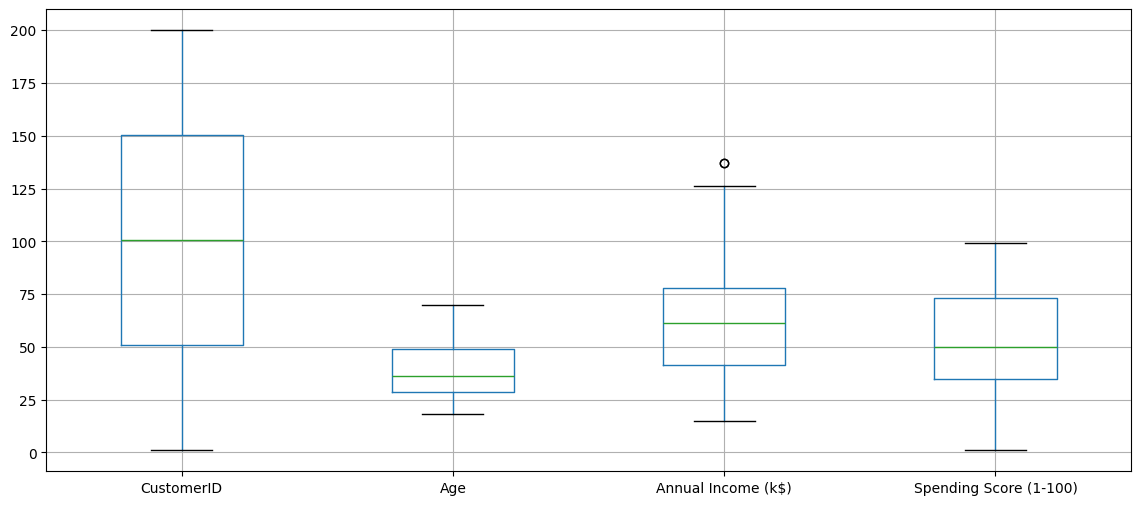

In [9]:
# Draw a boxplot for all numerical columns to check for potential outliers

df.boxplot(figsize=(14,6))
plt.show()


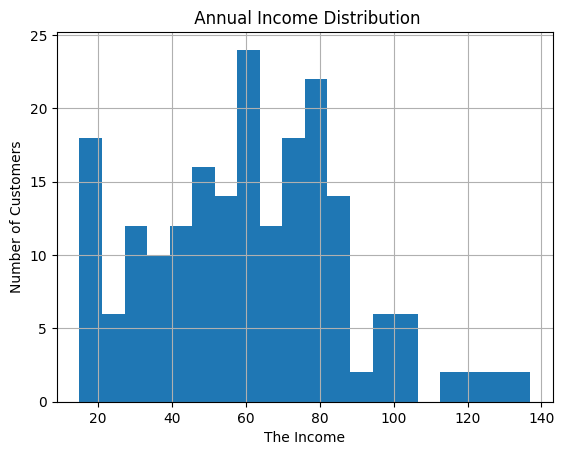

In [10]:
# Plot histogram for Annual Income column to check their distributions

df["Annual Income (k$)"].hist(bins=20)
plt.title(" Annual Income Distribution")
plt.xlabel("The Income")
plt.ylabel("Number of Customers")
plt.show()

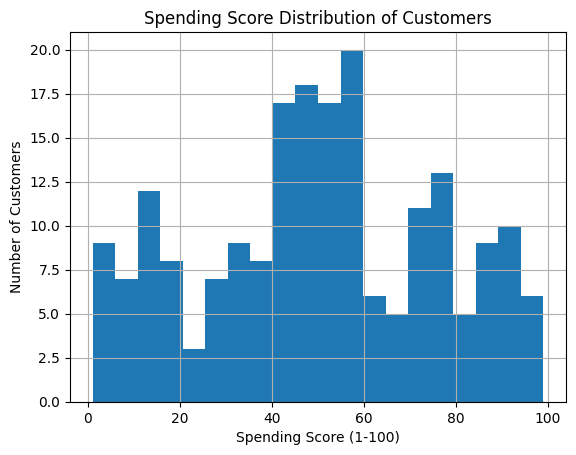

In [11]:
# Plot histogram for Spending Score column to check their distributions

df["Spending Score (1-100)"].hist(bins=20)
plt.title("Spending Score Distribution of Customers")
plt.xlabel("Spending Score (1-100)")
plt.ylabel("Number of Customers")
plt.show()

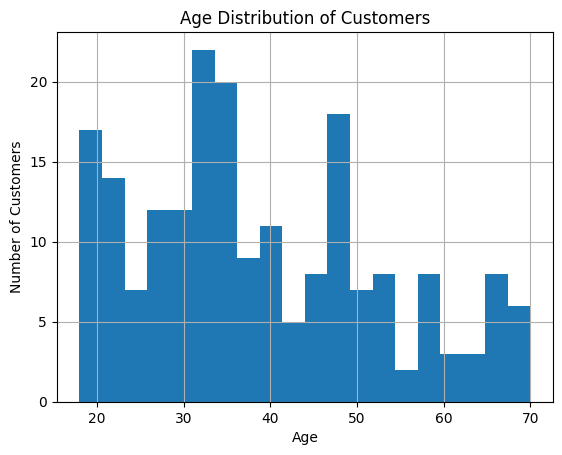

In [12]:
# Plot histogram for Age column to check their distributions

df["Age"].hist(bins=20)
plt.title("Age Distribution of Customers")
plt.xlabel("Age")
plt.ylabel("Number of Customers")
plt.show()

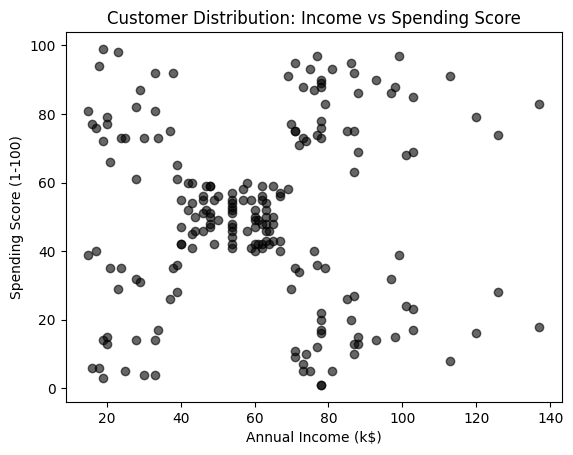

In [13]:
plt.scatter(df["Annual Income (k$)"], df["Spending Score (1-100)"], c='black', alpha=0.6)
plt.xlabel("Annual Income (k$)")
plt.ylabel("Spending Score (1-100)")
plt.title("Customer Distribution: Income vs Spending Score")
plt.show()


### 5. Transform The Data

In [14]:
from sklearn.preprocessing import StandardScaler 

X = df[["Annual Income (k$)", "Spending Score (1-100)"]]

scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

### 6. Identify Optimal Number of clusters

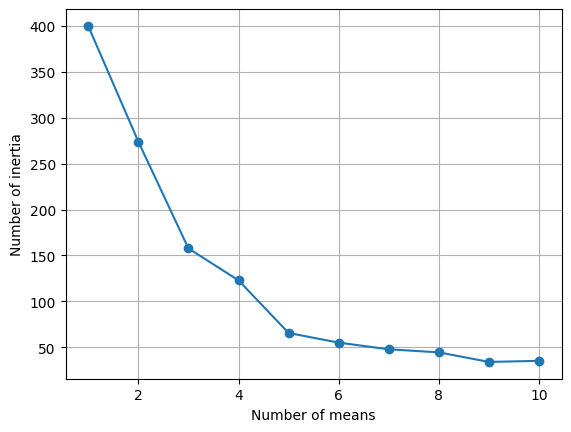

In [15]:
# Elbow method to find the best number of clusters k
from sklearn.cluster import KMeans

means = []
inertias = []

for k in range(1, 11):
    kmeans= KMeans(n_clusters=k)
    kmeans.fit(X_scaled)
    means.append(k)
    inertias.append(kmeans.inertia_)

plt.plot(means ,inertias,"o-")
plt.xlabel("Number of means")
plt.ylabel("Number of inertia")
plt.grid(True)
plt.show()

### 7. Applying K Means clustering 

In [16]:
kmeans = KMeans(n_clusters=5, n_init=10, random_state=42)
df["Cluster"] = kmeans.fit_predict(X_scaled)

### Plotting The Results

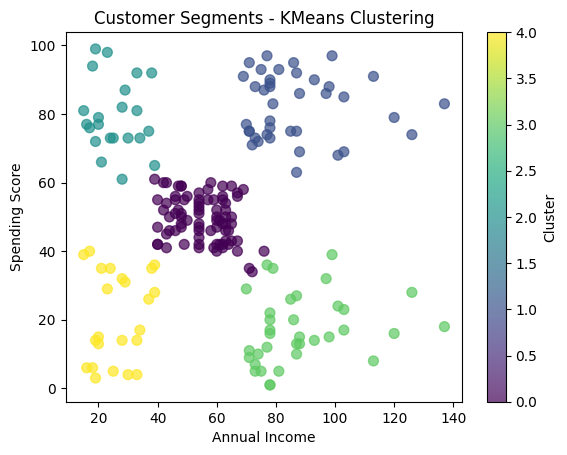

In [17]:
plt.scatter(df["Annual Income (k$)"], df["Spending Score (1-100)"], c=df["Cluster"], cmap="viridis", s=50, alpha=0.7)
plt.colorbar(label="Cluster")
plt.title("Customer Segments - KMeans Clustering")
plt.xlabel("Annual Income")
plt.ylabel("Spending Score")
plt.show()
plt.show()

### 8. Identify Optimal Number of eps

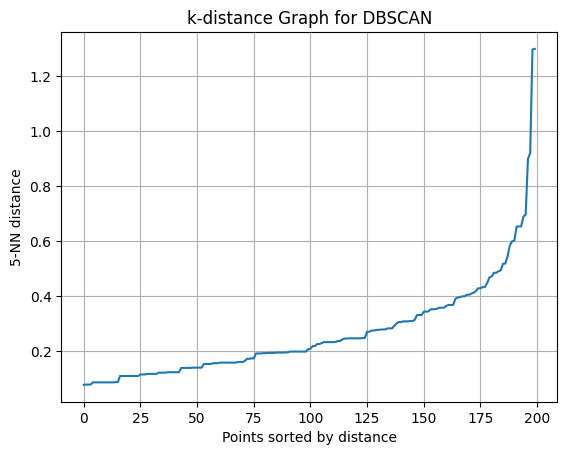

In [18]:
from sklearn.neighbors import NearestNeighbors

min_samples = 5  

# fit NearestNeighbors
neighbors = NearestNeighbors(n_neighbors=min_samples)
neighbors_fit = neighbors.fit(X_scaled)
distances, indices = neighbors_fit.kneighbors(X_scaled)

# sort distances to the kth neighbor
distances = np.sort(distances[:, -1])  

# plot
plt.plot(distances)
plt.xlabel("Points sorted by distance")
plt.ylabel(f"{min_samples}-NN distance")
plt.title("k-distance Graph for DBSCAN")
plt.grid(True)
plt.show()

### 8. Applying DBSCAN Clustering 

In [19]:
from sklearn.cluster import DBSCAN

dbscan = DBSCAN(eps=0.35, min_samples=5)
df["DBSCAN_Cluster"] = dbscan.fit_predict(X_scaled)
df["DBSCAN_Cluster"].value_counts()

DBSCAN_Cluster
 3    88
 4    31
-1    23
 5    23
 0    16
 1    12
 2     7
Name: count, dtype: int64

### Ploting The Results

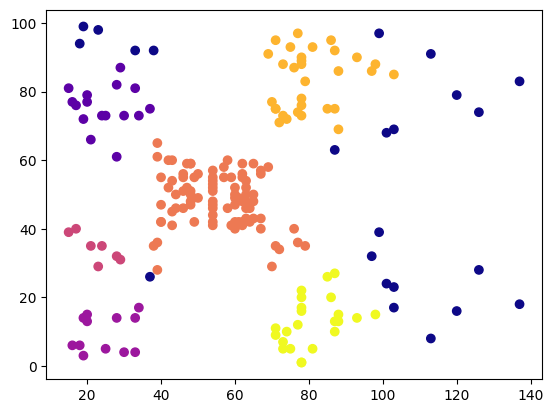

In [20]:
plt.scatter(df["Annual Income (k$)"], df["Spending Score (1-100)"], c=df["DBSCAN_Cluster"],cmap="plasma")
plt.show()

### 9.Calculate Silhouette Score for k-means and DBSCAN

In [29]:
from sklearn.metrics import silhouette_score

print("silhouette score for k-means =",silhouette_score(X_scaled,df["Cluster"]))
print("silhouette score for DBSCAN =",silhouette_score(X_scaled,df["DBSCAN_Cluster"]))

silhouette score for k-means = 0.5546571631111091
silhouette score for DBSCAN = 0.436768048377307


### 10. Average Spending Per Cluster

In [38]:
# Group by cluster and calculate mean values
kmeans_summary = df.groupby(["Cluster"])[["Annual Income (k$)", "Spending Score (1-100)"]].mean()
dbscan_summary = df.groupby(["DBSCAN_Cluster"])[["Annual Income (k$)", "Spending Score (1-100)"]].mean()
print("K-means Summary:\n")
print(kmeans_summary,"\n")
print("DBSCAN Summary:\n")
print(dbscan_summary)


K-means Summary:

         Annual Income (k$)  Spending Score (1-100)
Cluster                                            
0                 55.296296               49.518519
1                 86.538462               82.128205
2                 25.727273               79.363636
3                 88.200000               17.114286
4                 26.304348               20.913043 

DBSCAN Summary:

                Annual Income (k$)  Spending Score (1-100)
DBSCAN_Cluster                                            
-1                       89.260870               57.826087
 0                       24.750000               75.375000
 1                       24.583333                9.583333
 2                       22.428571               34.428571
 3                       55.227273               48.579545
 4                       80.290323               83.193548
 5                       80.956522               12.782609
